# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Nurul Fadillah
- **Email:** nurulfadillah1521@gmail.com
- **ID Dicoding:** nrifdiih

## Menentukan Pertanyaan Bisnis

- Bagaimana tren harga dan tingkat penjualan dari kategori kategori produk Health & Beauty dalam rentang tahun Oktober 2016 – Oktober 2018?
- Berdasarkan informasi penjualan di sepanjang tahun 2017, kota apa yang menduduki record penjualan terbanyak dan kategori produk apa yang paling banyak terjual pada waktu tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahapan ini, saya akan meng-import datasets yang relevan dalam analisis yang akan saya lakukan

In [2]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
product_category_name_translation_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

#### Menilai tabel "customers_df"

In [7]:
customers_df.info()
customers_df.isna().sum() 
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe(include="all")
customers_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0


customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

**Insight:**
- Tidak ada missing value dari setiap kolom
- Tidak ada duplicates
- Dari hasil penggunaan metode .describe(), tidak ada keanehan. hanya saja, program menghitung parameter statistik dari kolom "code_prefix" yang mana seharusnya tidak perlu karena code_prefix
- Tipe data customer_zip_code_prefix seharusnya object bukan integer karena tidak diperuntukkan untuk operasi matematika

#### Menilai tabel "orders_df"

In [8]:
orders_df.info()
orders_df.isna().sum() 
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe(include="all")
orders_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah duplikasi:  0


order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

**Insight:**
- Beberapa kolom yang memiliki missing value, antara lain: "order_approved_at" sebanyak 160, "order_delivered_carrier_date" sebanyak 1783, dan "order_delivered_customer_date" sebanyak 2965. Namun, karena ketiga variabel ini tidak akan saya libatkan dalam analisis yang saya lakukan, maka saya akan melakukan dropping pada variabel tersebut
- Tidak ditemukan duplicates pada data
- Tipe data "order_delivered_customer_date" masih salah. Seharusnya adalah "datetime", bukan "object"

#### Menilai tabel "products_df"

In [9]:
products_df.info()
products_df.isna().sum() 
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe(include="all")
products_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

**Insight:**
- Terdapat duplicates pada kolom "product_category_name", "product_name_length", "pruduct_description_length", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm", dan "prudct_photos_qty". Tapi, duplikat pada kolom ini tidak perlu dihapus karena sangat memungkinkan suatu produk memiliki length nama yang sama, description length yang sama, jumlah foto yang di-display sama, memiliki berat, panjang, lebar, dan tinggi yang sama, dan berada di kategori yang sama
- Terdapat missing value pada product_category_name, product_name_length, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_widht_cm. Namun, karena proses analisis yang akan saya lakukan tidak melibatkan variabel tersebut, maka saya akan membiarkan variabel-variabel tersebut

#### Menilai tabel "order_items_df"

In [10]:
order_items_df.info()
order_items_df.isna().sum() 
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe(include="all")
order_items_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi:  0


order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

**Insight:**
- Tidak ada missing value
- Tidak ada duplicates
- Tipe data shipping_limit_date seharusnya bukan object tetapi datetime

### Cleaning Data

#### Membersihkan tabel customers_df

##### Saya akan mengganti tipe data customer_zip_code_prefix dari integer ke object

In [11]:
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].astype('object')

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


Tipe data kolom "customer_zip_code_prefix" berhasil diubah

#### Membersihkan tabel orders_df

##### Drop kolom-kolom yang tidak terpakai

Pada analisis ini, saya tidak akan melibatkan variabel "order_status", "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", dan "order_estimated_delivery_date". Maka dari itu, saya akan melakukan dropping pada kelima variabel tersebut

Hal ini karena saya hanya akan menggunakan variabel "order_delivered_customer_date", yakni variabel yang menyimpan data tanggal produk diterima oleh pembeli, sebagai indikator bahwa pelanggan benar-benar membeli produk (bukan hanya purchase namun di-cancel, etc yang artinya produk tidak betul-betul dibeli oleh user)

In [12]:
orders_df = orders_df.drop(columns=['order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date'])

In [13]:
orders_df.head()

,order_id,customer_id,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-16 18:17:02


Kelima kolom berhasil dihapus dan orders_df sekarang hanya terdiri dari variabel "order_id", "customer_id", dan "order_delivered_customer_date"

##### Ubah tipe data order_delivered_customer_date menjadi datetime

Selanjutnya, saya akan mengubah tipe data order_delivered_customer_date menjadi tipe data yang sesuai, yakni tipe data datetime

In [14]:
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_delivered_customer_date  96476 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 2.3+ MB


Tipe data berhasil diubah

#### Membersihkan tabel products_df

##### Drop produk yang tidak memiliki data kategori

Saya akan menghapus (drop) produk yang data kategorinya kosong. Keputusan ini diambil karena jumlah data yang mengandung missing value sangat insignifikan terhadpa total jumlah seluruh data, yakni hanya 610. Jadi, tidak masalah jika langsung di drop dalam rangka mengefisiensikan waktu

In [15]:
products_df.dropna(inplace=True)

#### Membersihkan tabel order_items_df

##### Ubah tipe data kolom "shipping_limit_date" menjadi tipe data datetime

Pada tahapan ini, saya akan mengubah tipe data kolom "shipping_limit_date" menjadi tipe data datetime karena kolom ini menyimpan informasi tanggal

In [16]:
#mengubah tipe data ke datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Tipe data kolom "shipping_limit_date" berhasil diubah

## Exploratory Data Analysis (EDA)

**Pertama, saya akan fokus mengeksplorasi data dalam rangka menjawab pertanyaan 1**

### Explore products_df & order_items_df

#### Buat copy terlebih dahulu dari dataset asli

In [17]:
products_df_1 = products_df.copy()
order_items_df_1 = order_items_df.copy()

#### Saya akan menggabungkan dataset products_df_1 & order_items_df_1

In [18]:
orderitems_products_df = pd.merge(
    left=order_items_df_1,
    right=products_df_1,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
orderitems_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


Drop kolom yang tidak relevan

In [19]:
orderitems_products_df = orderitems_products_df.drop(['order_item_id', 'seller_id', 'shipping_limit_date', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1)

In [20]:
orderitems_products_df.head()

,order_id,product_id,price,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,ferramentas_jardim


#### Tambahkan terjemahan nama produk 

In [21]:
orderitems_products_df = pd.merge(
    left=orderitems_products_df,
    right=product_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
orderitems_products_df.head()

,order_id,product_id,price,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,ferramentas_jardim,garden_tools


### Explore orders_df

#### Buat copy dari dataset asli

In [22]:
orders_df_1 = orders_df.copy()

#### Gabungkan dataset "orderitems_products_df" dengan "orders_df_1"

In [23]:
orderitems_products_df = pd.merge(
    left=orderitems_products_df,
    right=orders_df_1,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orderitems_products_df.head()

,order_id,product_id,price,product_category_name,product_category_name_english,customer_id,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff,cool_stuff,3ce436f183e68e07877b285a838db11a,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,moveis_decoracao,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,perfumaria,perfumery,d4eb9395c8c0431ee92fce09860c5a06,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,ferramentas_jardim,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,2017-03-01 16:42:31


Drop kolom yang tidak relevan

In [24]:
orderitems_products_df = orderitems_products_df.drop(['customer_id'], axis=1)

Karena ini adalah dataset final maka saya akan menyimpannya ke dataset baru khusus untuk dianalisis untuk final

In [25]:
q1_df = orderitems_products_df.copy()

#### Bersihkan sedikit dataset final

In [26]:
#handling missing value
q1_df.isna().sum()
q1_df = q1_df.dropna()
q1_df.head()

#handling duplicates
# Mengecek kolom yang memiliki nilai duplikat
duplicate_columns = q1_df.columns[q1_df.apply(lambda x: x.duplicated().any())]
print("Kolom dengan nilai duplikat:", duplicate_columns.tolist())
# Menghapus baris dengan order_id duplikat
q1_df = q1_df.drop_duplicates(subset='order_id', keep='first')
# Memeriksa kembali jumlah duplicates
print("Jumlah duplikasi: ", q1_df.duplicated().sum())

Kolom dengan nilai duplikat: ['order_id', 'product_id', 'price', 'product_category_name', 'product_category_name_english', 'order_delivered_customer_date']
Jumlah duplikasi:  0


In [27]:
q1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95124 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       95124 non-null  object        
 1   product_id                     95124 non-null  object        
 2   price                          95124 non-null  float64       
 3   product_category_name          95124 non-null  object        
 4   product_category_name_english  95124 non-null  object        
 5   order_delivered_customer_date  95124 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 5.1+ MB


#### Karena fokus bahasan saya kali ini hanya health_beauty maka saya akan melakukan drop pada produk dengan kategori selain ini

In [28]:
health_beauty_q1_df = q1_df[q1_df['product_category_name_english'] == 'health_beauty']

# Menampilkan hasil
health_beauty_q1_df.head()
health_beauty_q1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8609 entries, 8 to 112624
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       8609 non-null   object        
 1   product_id                     8609 non-null   object        
 2   price                          8609 non-null   float64       
 3   product_category_name          8609 non-null   object        
 4   product_category_name_english  8609 non-null   object        
 5   order_delivered_customer_date  8609 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 470.8+ KB


**Kedua, saya akan fokus mengeksplorasi data dalam rangka menjawab pertanyaan 2**

### Explore customers_df dan orders_df

Eksplorasi pada dataset "customers_df" berfokus untuk mencari tahu kota apa yang menduduki rekor penjualan terbanyak di sepanjang tahun 2016

Saya akan melakukan eksplorasi terhadap tabel customers_df yang berfokus pada kota dan negara bagian asal dari para customer untuk mengetahui demografi customer pada aspek daerah

#### Melakukan copy terhadap dataset asli terlebih dahulu agar tidak mengubah dataset asli

In [29]:
orders_df_2 = orders_df.copy()
customers_df_2 = customers_df.copy()

#### Menentukan Rentang Waktu yang Akan Dijadikan Fokus Analisis

In [30]:
# Ekstrak tahun dan bulan
orders_df_2['year'] = orders_df_2['order_delivered_customer_date'].dt.year
orders_df_2['month'] = orders_df_2['order_delivered_customer_date'].dt.month_name()

# Mengambil tahun yang diinginkan
years_of_interest = [2016, 2017, 2018]

# Mengelompokkan berdasarkan tahun dan bulan, lalu mengumpulkan bulan yang tersedia untuk setiap tahun
available_months = (
    orders_df_2[orders_df_2['year'].isin(years_of_interest)]
    .groupby('year')['month']
    .unique()
)

# Menampilkan hasil
for year in available_months.index:
    print(f'Tahun {year}: {available_months[year]}')

Tahun 2016.0: ['October' 'November' 'December']
Tahun 2017.0: ['October' 'December' 'July' 'May' 'February' 'August' 'November'
 'September' 'April' 'June' 'March' 'January']
Tahun 2018.0: ['August' 'February' 'June' 'July' 'March' 'January' 'May' 'April'
 'September' 'October']


Didapati fakta bahwa tahun 2017 adalah tahun dengan data terlengkap di mana ke-12 bulan ada. Atas dasar alasan tersebut, saya memutuskan untuk memfokuskan analisis pada rentang tahun 2017

#### Saya akan menggabungkan tabel "customers_df_2" dan "orders_df_2" 

In [31]:
customers_orders_df = pd.merge(
    left=customers_df_2,
    right=orders_df_2,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_delivered_customer_date,year,month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-25 10:35:35,2017.0,May
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-29 12:41:19,2018.0,January
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-06-14 17:58:51,2018.0,June
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-28 16:04:25,2018.0,March
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-08-09 20:55:48,2018.0,August


Drop kolom yang tidak dibutuhkan, yakni kolom "customer_zip_code_prefix" dan "customer_state" karena saya hanya membutuhkan informasi nama kota, bukan kode zip maupun nama negara bagian

In [32]:
customers_orders_df = customers_orders_df.drop(['customer_zip_code_prefix', 'customer_state'], axis=1)

In [33]:
customers_orders_df.head()

,customer_id,customer_unique_id,customer_city,order_id,order_delivered_customer_date,year,month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,00e7ee1b050b8499577073aeb2a297a1,2017-05-25 10:35:35,2017.0,May
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,29150127e6685892b6eab3eec79f59c7,2018-01-29 12:41:19,2018.0,January
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-06-14 17:58:51,2018.0,June
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,951670f92359f4fe4a63112aa7306eba,2018-03-28 16:04:25,2018.0,March
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-08-09 20:55:48,2018.0,August


#### Karena analisis hanya dilakukan secara spesifik pada rentang tahun 2017, maka saya hanya akan mengambil record data yang sesuai dengan rentang waktu tersebut

In [34]:
customers_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_city                  99441 non-null  object        
 3   order_id                       99441 non-null  object        
 4   order_delivered_customer_date  96476 non-null  datetime64[ns]
 5   year                           96476 non-null  float64       
 6   month                          96476 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 5.3+ MB


In [35]:
customers_orders_df = customers_orders_df[customers_orders_df['order_delivered_customer_date'].dt.year == 2017]

In [36]:
customers_orders_df.head()

,customer_id,customer_unique_id,customer_city,order_id,order_delivered_customer_date,year,month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,00e7ee1b050b8499577073aeb2a297a1,2017-05-25 10:35:35,2017.0,May
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,jaragua do sul,5741ea1f91b5fbab2bd2dc653a5b5099,2017-09-28 17:32:43,2017.0,September
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,timoteo,1093c8304c7a003280dd34598194913d,2017-11-27 12:44:36,2017.0,November
10,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,montes claros,8428e578bb1cf839ae26a6b7615502b9,2017-12-08 22:16:17,2017.0,December
12,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,lencois paulista,83d8f70418eefd96f37b483dff430305,2017-09-20 20:23:34,2017.0,September


In [37]:
#Mengetahui jumlah data pada setiap bulan
jan_orders = customers_orders_df[
    (customers_orders_df['order_delivered_customer_date'].dt.year == 2017) & 
    (customers_orders_df['order_delivered_customer_date'].dt.month == 1)
]
print("Jumlah order pada bulan Januari:", len(jan_orders))

feb_orders = customers_orders_df[
    (customers_orders_df['order_delivered_customer_date'].dt.year == 2017) & 
    (customers_orders_df['order_delivered_customer_date'].dt.month == 2)
]
print("Jumlah order pada bulan Februari:", len(feb_orders))

mar_orders = customers_orders_df[
    (customers_orders_df['order_delivered_customer_date'].dt.year == 2017) & 
    (customers_orders_df['order_delivered_customer_date'].dt.month == 3)
]
print("Jumlah order pada bulan Maret:", len(mar_orders))

apr_orders = customers_orders_df[
    (customers_orders_df['order_delivered_customer_date'].dt.year == 2017) & 
    (customers_orders_df['order_delivered_customer_date'].dt.month == 4)
]
print("Jumlah order pada bulan April:", len(apr_orders))

may_orders = customers_orders_df[
    (customers_orders_df['order_delivered_customer_date'].dt.year == 2017) & 
    (customers_orders_df['order_delivered_customer_date'].dt.month == 5)
]
print("Jumlah order pada bulan Mei:", len(may_orders))

jun_orders = customers_orders_df[
    (customers_orders_df['order_delivered_customer_date'].dt.year == 2017) & 
    (customers_orders_df['order_delivered_customer_date'].dt.month == 6)
]
print("Jumlah order pada bulan Juni:", len(jun_orders))

jul_orders = customers_orders_df[
    (customers_orders_df['order_delivered_customer_date'].dt.year == 2017) & 
    (customers_orders_df['order_delivered_customer_date'].dt.month == 7)
]
print("Jumlah order pada bulan Juli:", len(jul_orders))

aug_orders = customers_orders_df[
    (customers_orders_df['order_delivered_customer_date'].dt.year == 2017) & 
    (customers_orders_df['order_delivered_customer_date'].dt.month == 8)
]
print("Jumlah order pada bulan Agustus:", len(aug_orders))

sep_orders = customers_orders_df[
    (customers_orders_df['order_delivered_customer_date'].dt.year == 2017) & 
    (customers_orders_df['order_delivered_customer_date'].dt.month == 9)
]
print("Jumlah order pada bulan September:", len(sep_orders))

oct_orders = customers_orders_df[
    (customers_orders_df['order_delivered_customer_date'].dt.year == 2017) & 
    (customers_orders_df['order_delivered_customer_date'].dt.month == 10)
]
print("Jumlah order pada bulan Oktober:", len(oct_orders))

nov_orders = customers_orders_df[
    (customers_orders_df['order_delivered_customer_date'].dt.year == 2017) & 
    (customers_orders_df['order_delivered_customer_date'].dt.month == 11)
]
print("Jumlah order pada bulan November:", len(nov_orders))

dec_orders = customers_orders_df[
    (customers_orders_df['order_delivered_customer_date'].dt.year == 2017) & 
    (customers_orders_df['order_delivered_customer_date'].dt.month == 12)
]
print("Jumlah order pada bulan Desember:", len(dec_orders))

Jumlah order pada bulan Januari: 283
Jumlah order pada bulan Februari: 1351
Jumlah order pada bulan Maret: 2382
Jumlah order pada bulan April: 1849
Jumlah order pada bulan Mei: 3751
Jumlah order pada bulan Juni: 3223
Jumlah order pada bulan Juli: 3455
Jumlah order pada bulan Agustus: 4302
Jumlah order pada bulan September: 3965
Jumlah order pada bulan Oktober: 4494
Jumlah order pada bulan November: 4670
Jumlah order pada bulan Desember: 7205


In [38]:
customers_orders_df.describe(include="all")

,customer_id,customer_unique_id,customer_city,order_id,order_delivered_customer_date,year,month
count,40930,40930,40930,40930,40930,40930.0,40930
unique,40930,39705,3156,40930,NaN,NaN,12
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,28db69209a75e59f20ccbb5c36a20b90,NaN,NaN,December
freq,1,8,5959,1,NaN,NaN,7205
mean,NaN,NaN,NaN,NaN,2017-08-20 23:37:33.197850112,2017.0,NaN
min,NaN,NaN,NaN,NaN,2017-01-11 13:14:05,2017.0,NaN
25%,NaN,NaN,NaN,NaN,2017-06-06 16:58:51.500000,2017.0,NaN
50%,NaN,NaN,NaN,NaN,2017-08-31 16:45:34,2017.0,NaN
75%,NaN,NaN,NaN,NaN,2017-11-13 23:36:12.500000,2017.0,NaN
max,NaN,NaN,NaN,NaN,2017-12-31 15:19:16,2017.0,NaN


Data berhasil diekstrak. Sekarang, dataset hanya terdiri dari data pesanan di tahun 2017

#### Sekarang saya akan mencari tahu pada setiap bulannya, kota mana yang paling banyak melakukan pembelian 

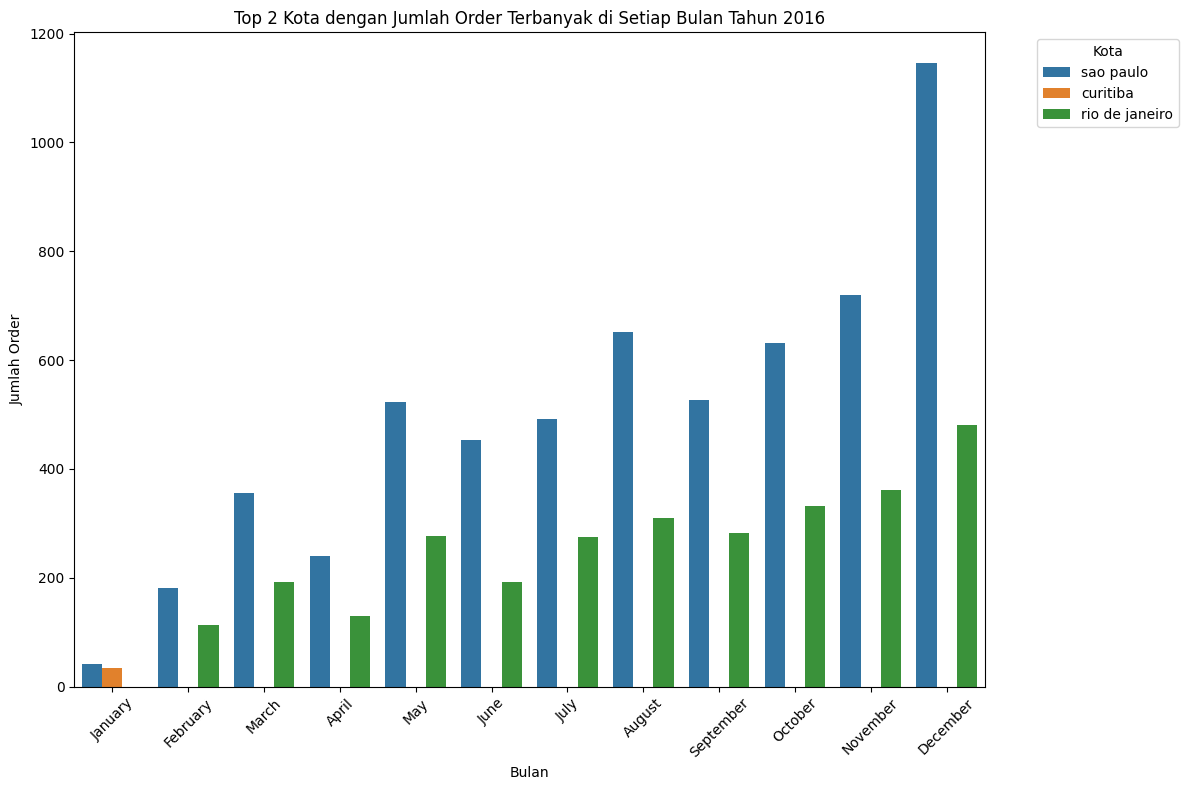

In [39]:
# Mengelompokkan data berdasarkan bulan dan kota, menghitung jumlah order
grouped = customers_orders_df.groupby(['month', 'customer_city']).size().reset_index(name='order_count')

# Mencari dua kota dengan order terbanyak di setiap bulan
top_cities_per_month = (
    grouped.sort_values('order_count', ascending=False)
    .groupby('month')
    .head(2)
)

# Mengurutkan bulan agar tampil dari Januari ke Desember
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
top_cities_per_month['month'] = pd.Categorical(top_cities_per_month['month'], categories=month_order, ordered=True)

# Mengurutkan berdasarkan bulan dan order_count (descending)
top_cities_per_month = top_cities_per_month.sort_values(by=['month', 'order_count'], ascending=[True, False])

# Visualisasi
plt.figure(figsize=(12, 8))
sns.barplot(data=top_cities_per_month, x='month', y='order_count', hue='customer_city')
plt.title('Top 2 Kota dengan Jumlah Order Terbanyak di Setiap Bulan Tahun 2016')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=45)
plt.legend(title='Kota', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Insights:** 
- Dari gambar, terlihat bahwa di Bulan Januari, top 2 kota yang paling banyak melakukan pembelian adalah Sao Paulo (1) dan Curitiba (2)
- Sementara itu pada Bulan Februari dan seterusnya, kota yang paling banyak melakukan pembelian adalah Sao Paulo (1) dan Rio de Janeiro (2)
- Sao Paulo selalu menjadi kota dengan total pembelian paling banyak berturut-turut selama 12 bulan

### Explore order_items_df

In [40]:
order_items_df_2 = order_items_df.copy()

#### Saya akan menggabungkan dataset "customers_orders_df" dengan "order_items_df_2"

Langkah ini bertujuan untuk memasukkan kolom "product_id" dari tabel "order_items_df" ke dalam tabel "customers_orders_df"

In [41]:
order_items_df_2.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [42]:
customers_orders_df.head()

,customer_id,customer_unique_id,customer_city,order_id,order_delivered_customer_date,year,month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,00e7ee1b050b8499577073aeb2a297a1,2017-05-25 10:35:35,2017.0,May
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,jaragua do sul,5741ea1f91b5fbab2bd2dc653a5b5099,2017-09-28 17:32:43,2017.0,September
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,timoteo,1093c8304c7a003280dd34598194913d,2017-11-27 12:44:36,2017.0,November
10,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,montes claros,8428e578bb1cf839ae26a6b7615502b9,2017-12-08 22:16:17,2017.0,December
12,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,lencois paulista,83d8f70418eefd96f37b483dff430305,2017-09-20 20:23:34,2017.0,September


In [43]:
customers_orders_df = pd.merge(
    left=customers_orders_df,
    right=order_items_df_2,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_city,order_id,order_delivered_customer_date,year,month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,00e7ee1b050b8499577073aeb2a297a1,2017-05-25 10:35:35,2017.0,May,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,jaragua do sul,5741ea1f91b5fbab2bd2dc653a5b5099,2017-09-28 17:32:43,2017.0,September,1,0be701e03657109a8a4d5168122777fb,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31
2,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,timoteo,1093c8304c7a003280dd34598194913d,2017-11-27 12:44:36,2017.0,November,1,124f74f703e88efe001a10bfa718b6ff,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11
3,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,montes claros,8428e578bb1cf839ae26a6b7615502b9,2017-12-08 22:16:17,2017.0,December,1,6b874ff4c71d18e91079b40396bf176a,b6e1504972665f739dec4facb9943775,2017-12-01 18:01:20,25.30,15.10
4,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,lencois paulista,83d8f70418eefd96f37b483dff430305,2017-09-20 20:23:34,2017.0,September,1,3fc00af0f0a8d4ac2933d3900416c977,7a241947449cc45dbfda4f9d0798d9d0,2017-09-14 10:10:17,99.00,18.31


Selanjutnya, saya akan melakukan dropping pada variabel-variabel yang tidak akan dilibatkan dalam analisis ini

In [44]:
customers_orders_df = customers_orders_df.drop(['order_item_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value'], axis=1)

In [45]:
customers_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46803 entries, 0 to 46802
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    46803 non-null  object        
 1   customer_unique_id             46803 non-null  object        
 2   customer_city                  46803 non-null  object        
 3   order_id                       46803 non-null  object        
 4   order_delivered_customer_date  46803 non-null  datetime64[ns]
 5   year                           46803 non-null  float64       
 6   month                          46803 non-null  object        
 7   product_id                     46803 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 2.9+ MB


### Explore products_df

In [46]:
products_df_2 = products_df.copy()

#### Saya akan menggabungkan dataset "customers_orders_df" dengan "products_df_2"

In [47]:
products_df_2.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Langkah ini bertujuan untuk memasukkan kolom "product_category_name" dalam tabel "products_df" ke dalam tabel "customers_orders_df" berdasarkan "product_id"

In [48]:
customers_orders_df = pd.merge(
    left=customers_orders_df,
    right=products_df_2,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_city,order_id,order_delivered_customer_date,year,month,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,00e7ee1b050b8499577073aeb2a297a1,2017-05-25 10:35:35,2017.0,May,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,jaragua do sul,5741ea1f91b5fbab2bd2dc653a5b5099,2017-09-28 17:32:43,2017.0,September,0be701e03657109a8a4d5168122777fb,esporte_lazer,32.0,282.0,2.0,4450.0,60.0,15.0,15.0
2,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,timoteo,1093c8304c7a003280dd34598194913d,2017-11-27 12:44:36,2017.0,November,124f74f703e88efe001a10bfa718b6ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,montes claros,8428e578bb1cf839ae26a6b7615502b9,2017-12-08 22:16:17,2017.0,December,6b874ff4c71d18e91079b40396bf176a,automotivo,41.0,1117.0,8.0,300.0,31.0,17.0,27.0
4,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,lencois paulista,83d8f70418eefd96f37b483dff430305,2017-09-20 20:23:34,2017.0,September,3fc00af0f0a8d4ac2933d3900416c977,climatizacao,59.0,624.0,5.0,2000.0,20.0,10.0,20.0


Lakukan dropping pada variabel yang tidak terpakai

In [49]:
customers_orders_df = customers_orders_df.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1)

In [50]:
customers_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46803 entries, 0 to 46802
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    46803 non-null  object        
 1   customer_unique_id             46803 non-null  object        
 2   customer_city                  46803 non-null  object        
 3   order_id                       46803 non-null  object        
 4   order_delivered_customer_date  46803 non-null  datetime64[ns]
 5   year                           46803 non-null  float64       
 6   month                          46803 non-null  object        
 7   product_id                     46803 non-null  object        
 8   product_category_name          45994 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 3.2+ MB


#### Menambahkan Nama Kategori Produk Versi Bahasa Inggris

Penggabungan dua dataset tersebut didasarkan pada "product_category_name" 

In [51]:
q2_df = pd.merge(
    left=customers_orders_df,
    right=product_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
q2_df.head()

,customer_id,customer_unique_id,customer_city,order_id,order_delivered_customer_date,year,month,product_id,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,00e7ee1b050b8499577073aeb2a297a1,2017-05-25 10:35:35,2017.0,May,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,office_furniture
1,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,jaragua do sul,5741ea1f91b5fbab2bd2dc653a5b5099,2017-09-28 17:32:43,2017.0,September,0be701e03657109a8a4d5168122777fb,esporte_lazer,sports_leisure
2,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,timoteo,1093c8304c7a003280dd34598194913d,2017-11-27 12:44:36,2017.0,November,124f74f703e88efe001a10bfa718b6ff,NaN,NaN
3,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,montes claros,8428e578bb1cf839ae26a6b7615502b9,2017-12-08 22:16:17,2017.0,December,6b874ff4c71d18e91079b40396bf176a,automotivo,auto
4,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,lencois paulista,83d8f70418eefd96f37b483dff430305,2017-09-20 20:23:34,2017.0,September,3fc00af0f0a8d4ac2933d3900416c977,climatizacao,air_conditioning


Ini adalah dataset yang sudah final dan akan digunakan dalam menjawab pertanyaan 2

In [52]:
q2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46803 entries, 0 to 46802
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    46803 non-null  object        
 1   customer_unique_id             46803 non-null  object        
 2   customer_city                  46803 non-null  object        
 3   order_id                       46803 non-null  object        
 4   order_delivered_customer_date  46803 non-null  datetime64[ns]
 5   year                           46803 non-null  float64       
 6   month                          46803 non-null  object        
 7   product_id                     46803 non-null  object        
 8   product_category_name          45994 non-null  object        
 9   product_category_name_english  45990 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 3.6+ MB


#### Lakukan sedikit cleaning pada dataset yang sudah final

In [53]:
#handling missing value
q2_df.isna().sum()
q2_df = q2_df.dropna()
q2_df.head()

#handling duplicates
# Mengecek kolom yang memiliki nilai duplikat
duplicate_columns = q2_df.columns[q2_df.apply(lambda x: x.duplicated().any())]
print("Kolom dengan nilai duplikat:", duplicate_columns.tolist())
# Menghapus baris dengan customer_id duplikat
q2_df = q2_df.drop_duplicates(subset='customer_id', keep='first')
# Memeriksa kembali jumlah duplicates
print("Jumlah duplikasi: ", q2_df.duplicated().sum())

Kolom dengan nilai duplikat: ['customer_id', 'customer_unique_id', 'customer_city', 'order_id', 'order_delivered_customer_date', 'year', 'month', 'product_id', 'product_category_name', 'product_category_name_english']
Jumlah duplikasi:  0


In [54]:
q2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40238 entries, 0 to 46802
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    40238 non-null  object        
 1   customer_unique_id             40238 non-null  object        
 2   customer_city                  40238 non-null  object        
 3   order_id                       40238 non-null  object        
 4   order_delivered_customer_date  40238 non-null  datetime64[ns]
 5   year                           40238 non-null  float64       
 6   month                          40238 non-null  object        
 7   product_id                     40238 non-null  object        
 8   product_category_name          40238 non-null  object        
 9   product_category_name_english  40238 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 3.4+ MB


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren harga dan tingkat penjualan dari kategori kategori produk Health & Beauty dalam rentang tahun Oktober 2016 – Oktober 2018?

C:\Users\USER\AppData\Local\Temp\ipykernel_2612\2318565827.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_beauty_df['order_delivered_customer_date'] = pd.to_datetime(health_beauty_df['order_delivered_customer_date'])


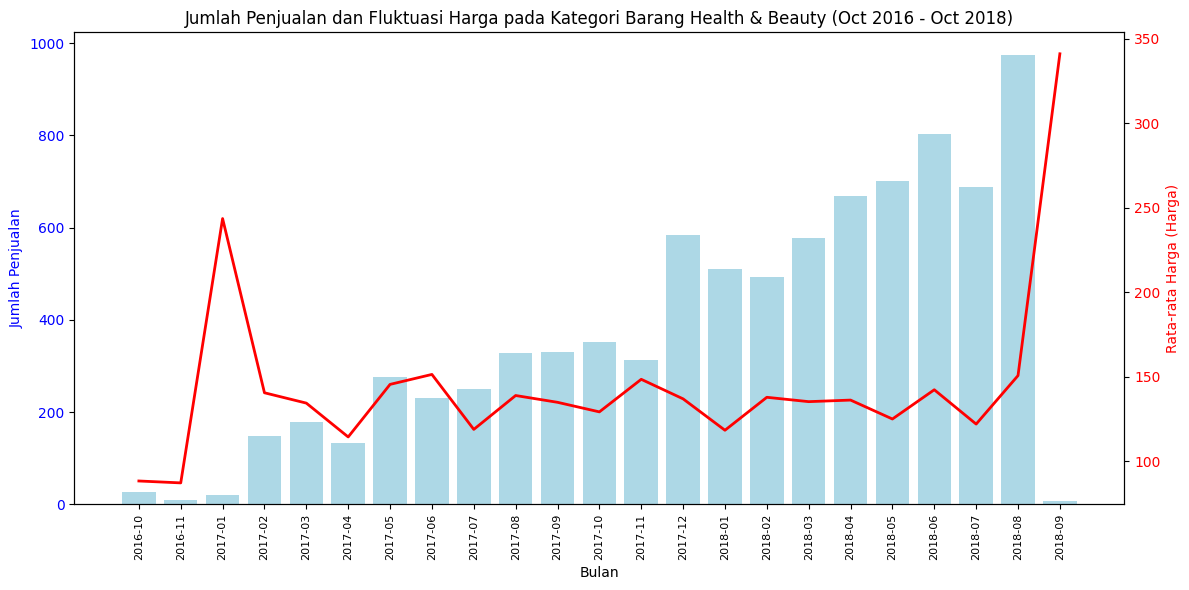

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsi q1_df sudah ada dan berisi kolom 'price' dan 'order_purchase_timestamp'
# Filter data untuk kategori 'health_beauty'
health_beauty_df = q1_df[q1_df['product_category_name_english'] == 'health_beauty']

# Konversi kolom tanggal menjadi datetime
health_beauty_df['order_delivered_customer_date'] = pd.to_datetime(health_beauty_df['order_delivered_customer_date'])

# Filter data untuk rentang waktu Oktober 2016 - Oktober 2018
mask = (health_beauty_df['order_delivered_customer_date'] >= '2016-10-01') & (health_beauty_df['order_delivered_customer_date'] <= '2018-10-31')
filtered_df = health_beauty_df[mask]

# Membuat kolom baru untuk bulan
filtered_df['month_year'] = filtered_df['order_delivered_customer_date'].dt.to_period('M')

# Menghitung total penjualan dan harga rata-rata per bulan
monthly_sales = filtered_df.groupby('month_year').size()
monthly_avg_price = filtered_df.groupby('month_year')['price'].mean()

# Plotting histogram untuk tingkat penjualan dan line plot untuk harga rata-rata
fig, ax1 = plt.subplots(figsize=(12, 6))

# Histogram untuk tingkat penjualan
ax1.bar(monthly_sales.index.astype(str), monthly_sales, color='lightblue', label='Sales')
ax1.set_xlabel('Bulan')
ax1.set_ylabel('Jumlah Penjualan', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Atur label sumbu X agar lebih kecil dan tidak overlap
plt.xticks(rotation=90, fontsize=8)

# Line plot untuk fluktuasi harga rata-rata
ax2 = ax1.twinx()
ax2.plot(monthly_avg_price.index.astype(str), monthly_avg_price, color='red', label='Average Price', linewidth=2)
ax2.set_ylabel('Rata-rata Harga (Harga)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Tambahkan judul
plt.title('Jumlah Penjualan dan Fluktuasi Harga pada Kategori Barang Health & Beauty (Oct 2016 - Oct 2018)')

# Tampilkan grafik
plt.tight_layout()
plt.show()

#### Explanatory Analysis

Grafik di atas menampilkan bar chart dengan sebuah line chart di atasnya. Rentang bulan yang tercatat adalah dari Oktober 2016 - Oktober 2018. Gambar tersebut menampilkan jumlah penjualan (bar chart) dan fluktuasi harga (line chart)

- Terlihat bahwa penjualan secara keseluruhan cenderung meningkat seiring waktu, dengan beberapa fluktuasi di bulan-bulan tertentu.
- Penjualan tertinggi dicapai pada bulan September 2018, yang menunjukkan lonjakan mendadak di akhir periode.
- Harga menunjukkan fluktuasi besar-besaran pada awal periode, dengan lonjakan yang sangat terlihat pada Januari 2017 di mana harga mencapai puncaknya. Namun, harga mulai turun setelahnya, diikuti dengan stabilisasi di pertengahan 2017 hingga awal 2018. Pada akhir periode, harga kembali melonjak drastis di September 2018, yang bersamaan dengan peningkatan tajam dalam penjualan.

Dari gambar tersebut, sering kali terdapat hubungan yang berbanding terbalik antara harga dengan jumlah penjualan, di mana saat harga tinggi, penjualan akan menurun. Contohnya yang ada pada bulan Januari tahun 2017. Saat harga turun, penjualan kembali meningkat. Dan pola ini terjadi lagi pada September 2018 di mana harga sangat tinggi dan produk yang terjual berkurang. Namun, pada beberapa periode lain, hubungan ini tidak selalu konstan. Sebagai contoh, pada Mei 2017, harga turun dan penjualan meningkat, yang sejalan dengan pola tersebut. Akan tetapi, menjelang akhir 2018, baik harga maupun penjualan mengalami peningkatan yang signifikan secara bersamaan, yang menandakan adanya kemungkinan faktor lain yang mempengaruhi penjualan di luar harga.

### Pertanyaan 2: Berdasarkan informasi penjualan di sepanjang tahun 2017, kota apa yang menduduki record penjualan terbanyak dan kategori produk apa yang paling banyak terjual pada waktu tersebut?

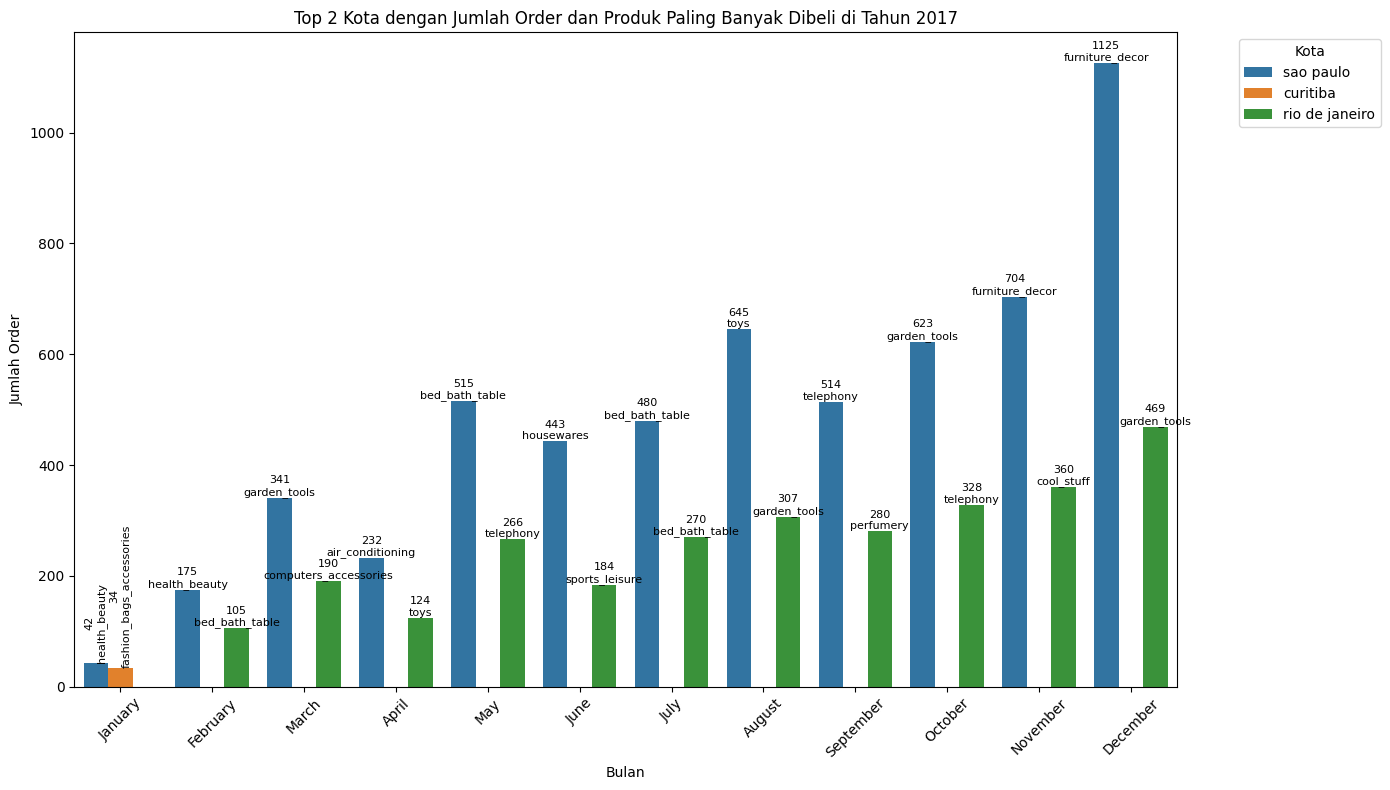

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil data untuk tahun 2017
orders_2017 = q2_df[q2_df['year'] == 2017]

# Mengelompokkan berdasarkan bulan dan kota, lalu menghitung jumlah order
grouped_2017 = orders_2017.groupby(['month', 'customer_city']).size().reset_index(name='order_count')

# Mencari dua kota dengan order terbanyak di setiap bulan
top_cities_per_month_2017 = (
    grouped_2017.sort_values('order_count', ascending=False)
    .groupby('month')
    .head(2)
)

# Mengurutkan bulan agar tampil dari Januari ke Desember
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
top_cities_per_month_2017['month'] = pd.Categorical(top_cities_per_month_2017['month'], categories=month_order, ordered=True)

# Mengurutkan berdasarkan bulan dan order_count (descending) agar bar yang lebih besar ada di kiri
top_cities_per_month_2017 = top_cities_per_month_2017.sort_values(by=['month', 'order_count'], ascending=[True, False])

# Mencari produk yang paling banyak dibeli di kota yang sama pada bulan yang sama
top_products_per_city_month = (
    orders_2017.groupby(['month', 'customer_city', 'product_id', 'product_category_name_english'])  # Menambahkan kategori produk
    .size()
    .reset_index(name='product_count')
)

# Mendapatkan produk terlaris untuk kota teratas
top_products_per_city_month = (
    top_products_per_city_month.sort_values('product_count', ascending=False)
    .groupby(['month', 'customer_city'])
    .head(1)  # Mengambil produk terlaris
)

# Menggabungkan data kota dengan jumlah order terbanyak dan produk terlaris
result = top_cities_per_month_2017.merge(top_products_per_city_month, on=['month', 'customer_city'])

# Visualisasi
plt.figure(figsize=(14, 8))
sns.barplot(data=result, x='month', y='order_count', hue='customer_city', dodge=True)
plt.title('Top 2 Kota dengan Jumlah Order dan Produk Paling Banyak Dibeli di Tahun 2017')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=45)

# Menambahkan label jumlah order dan kategori produk di atas setiap bar dengan ukuran font yang lebih kecil
for p in plt.gca().patches:
    order_count = p.get_height()
    if order_count > 0:
        # Cari label produk berdasarkan nilai order_count
        category_name = result.loc[result['order_count'] == order_count, 'product_category_name_english'].values[0]
        month_name = result.loc[result['order_count'] == order_count, 'month'].values[0]
        
        # Jika bulan Januari, labelnya vertikal, jika bukan, labelnya horizontal
        if month_name == 'January':
            plt.annotate(f'{int(order_count)}\n{category_name}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='bottom', fontsize=8, rotation=90)  # Label tegak untuk Januari
        else:
            plt.annotate(f'{int(order_count)}\n{category_name}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='bottom', fontsize=8)  # Label horizontal untuk bulan lain


# Mengatur legenda agar lebih rapi
plt.legend(title='Kota', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Explanatory Analysis

Pada gambar, dapat dilihat bahwa Sao Paulo secara konsisten menjadi kota dengan jumlah order terbanyak sepanjang tahun 2017, dengan puncaknya pada bulan Desember, mencapai 1125 order untuk kategori "furniture decor". Meskipun demikian, terdapat variasi dalam produk yang paling banyak dipesan setiap bulannya.

Pada bulan Januari, kota dengan jumlah order terbanyak kedua adalah Curitiba dengan 42 order, meskipun hanya sedikit dibandingkan dengan Sao Paulo. Untuk bulan-bulan selanjutnya, posisi kota dengan order terbanyak kedua diduduki oleh Rio de Janeiro, yang mulai muncul sejak bulan Maret. Terlihat bahwa perbedaan jumlah order antara Sao Paulo dan Rio de Janeiro lebih signifikan pada beberapa bulan seperti Agustus dan Desember.

Produk-produk favorit di setiap bulan juga beragam. Misalnya:
- Pada bulan Februari, "garden tools" menjadi kategori produk dengan order terbanyak di Sao Paulo, mencapai 341 order.
- Bulan April didominasi oleh kategori "bed_bath_table" di Sao Paulo dengan 515 order, sementara di bulan Desember, "furniture decor" mencatat angka tertinggi di kota yang sama.
- Kota Rio de Janeiro juga menunjukkan tren yang bervariasi, seperti pada bulan Juli dengan kategori "garden tools" yang mencapai 270 order dan Desember dengan 469 order di kategori yang sama.

## Conclusion

- Conclution pertanyaan 1: Bagaimana tren harga dan tingkat penjualan dari kategori kategori produk Health & Beauty dalam rentang tahun Oktober 2016 – Oktober 2018?



Analisis tren harga dan penjualan produk Health & Beauty dari Oktober 2016 hingga Oktober 2018 menunjukkan peningkatan penjualan secara keseluruhan, meskipun ada fluktuasi di beberapa bulan. Penjualan tertinggi terjadi pada September 2018, disertai lonjakan harga yang juga signifikan.

Fluktuasi harga terbesar terjadi pada awal 2017, dengan harga mencapai puncaknya pada Januari sebelum akhirnya stabil di pertengahan tahun. Hubungan antara harga dan penjualan sering kali berbanding terbalik: saat harga naik, penjualan menurun, seperti pada Januari 2017, dan sebaliknya. Namun, pada September 2018, keduanya meningkat bersamaan, mengindikasikan faktor lain, seperti promosi atau tren pasar, yang turut memengaruhi penjualan.


- Conclution pertanyaan 2 : Berdasarkan informasi penjualan di sepanjang tahun 2017, kota apa yang menduduki record penjualan terbanyak dan kategori produk apa yang paling banyak terjual pada waktu tersebut?

Sao Paulo secara konsisten menjadi kota dengan jumlah order terbanyak sepanjang tahun 2017, dengan puncaknya pada bulan Desember. Sementara itu, kota kedua dengan jumlah order terbanyak bervariasi, yaitu Curitiba pada bulan Januari dan Rio de Janeiro pada bulan-bulan berikutnya.

Selain itu, produk favorit yang paling banyak dipesan berubah setiap bulannya, mencerminkan tren musiman dan kebutuhan yang beragam di setiap kota. Produk seperti "garden tools," "bed_bath_table," dan "furniture decor" mendominasi berbagai bulan, menunjukkan bahwa preferensi produk sangat dinamis. Hal ini menunjukkan adanya variasi yang signifikan dalam pola konsumsi berdasarkan waktu dan kategori produk di kedua kota utama tersebut.

In [57]:
pip freeze requirements.txt

altair==5.4.1
anyio==4.4.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==24.2.0
babel==2.16.0
beautifulsoup4==4.12.3
bleach==6.1.0
blinker==1.8.2
cachetools==5.5.0
certifi==2024.8.30
cffi==1.17.1
charset-normalizer==3.3.2
click==8.1.7
colorama==0.4.6
comm==0.2.2
contourpy==1.3.0
cycler==0.12.1
debugpy==1.8.5
decorator==5.1.1
defusedxml==0.7.1
distlib==0.3.8
executing==2.1.0
fastjsonschema==2.20.0
filelock==3.16.1
fonttools==4.54.1
fqdn==1.5.1
gitdb==4.0.11
GitPython==3.1.43
h11==0.14.0
httpcore==1.0.5
httpx==0.27.2
idna==3.10
ipykernel==6.29.5
ipython==8.27.0
ipythonblocks==1.9.1
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.4
json5==0.9.25
jsonpointer==3.0.0
jsonschema==4.23.0
jsonschema-specifications==2023.12.1
jupyter-events==0.10.0
jupyter-lsp==2.2.5
jupyter_client==8.6.3
jupyter_core==5.7.2
jupyter_server==2.14.2
jupyter_server_terminals==0.5.3
jupyterlab==4.2.5
jupyterlab_pygments==0.3.0
jupyterlab_server==2.27.3
kiwisolve